In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn

from scipy import stats
import regex as re


seed = 42

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<Axes: >

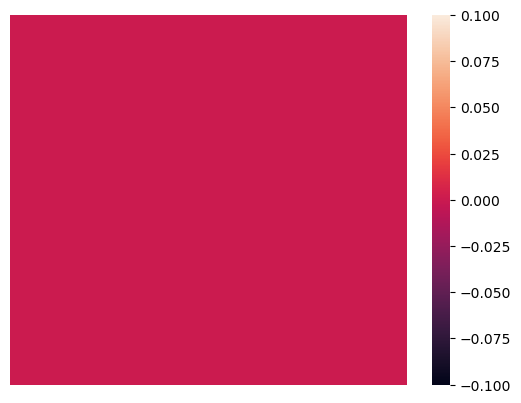

In [3]:
#Let's check missing values
sns.heatmap(df.isnull(),yticklabels=False,xticklabels=False,cbar="G")

In [4]:
#looks like there are no missing values
#again , we can confirm by using:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [5]:
#let's check some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#There are 6,362,620  rows  and 10 columns in the dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

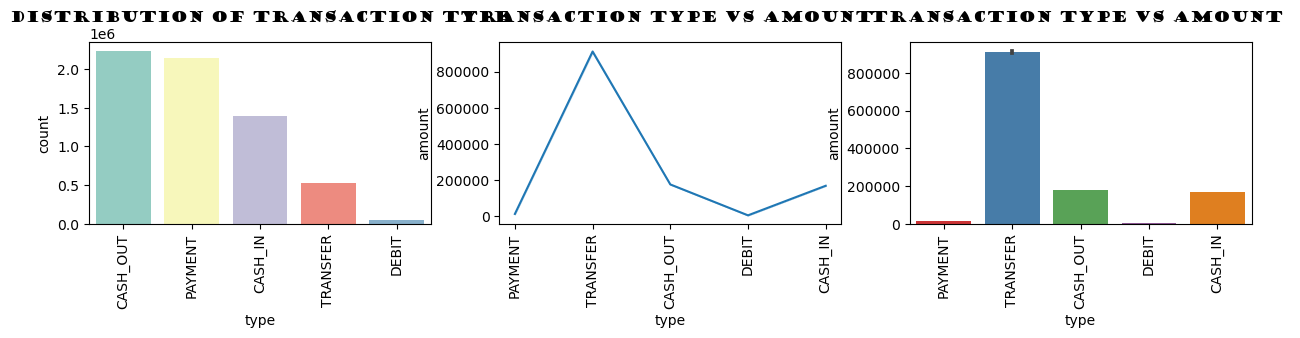

In [8]:
idef type_visulaization(col):
    plt.figure(figsize=(15,8))
    plt.subplot(3,3,1)
    ax=sns.countplot(x=col,data=df,order=df[col].value_counts().index,saturation=0.8,palette="Set3")
    ax.set_title("Distribution of Transaction Type",pad=15,fontsize=11,font="Goudy Stout")
    #ax.bar_label(ax.containers[0],rotation=90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    
    plt.subplot(3,3,2)
    ax=sns.lineplot(x=col,y="amount",data=df,palette="Set1")
    ax.set_title("Transaction Type VS amount ",pad=15,fontsize=11,font="Calisto MT")
    #ax.bar_label(ax.containers[0],rotation=90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    
    
    plt.subplot(3,3,3)
    ax=sns.barplot(x=col,y="amount",data=df,palette="Set1")
    ax.set_title("Transaction Type VS amount ",pad=15,fontsize=11,font="Cascadia Mono")
    #ax.bar_label(ax.containers[0],rotation=90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    
    
   
    plt.show()
type_visulaization("type")

Due to the large size of the data , many visualization will not be done (my device takes very long to produce an output)

# MODEL BUILDING

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df.drop("isFlaggedFraud",inplace=True,axis=1)


In [11]:
df["type"]=df["type"].replace({
    "PAYMENT":1,
    "CASH_IN":2,
    "CASH_OUT":0,
    "TRANSFER":3,
    "DEBIT":4
    
    
})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [12]:
x=df[['type', 'amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']]
y=df["isFraud"]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.8)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE

logistic=LogisticRegression(max_iter=100000)
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()
#grid_search=GridSearchCV()
clf=MultinomialNB()
svm=SVC()
#grid_search=GridSearchCV()
gus = GaussianNB()
ben = BernoulliNB(alpha=0.1,binarize=0.1)
knn=KNeighborsClassifier(n_neighbors=5)
minmax=MinMaxScaler()

In [15]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (1272524, 6)
y_train shape: (1272524,)


In [16]:
rfe=RFE(estimator=logistic,n_features_to_select=6,step=2)
rfe=rfe.fit(x_train,y_train)
selected_features=x_train.columns[rfe.support_]
selected_features

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [17]:
x_train=minmax.fit_transform(x_train)
x_test=minmax.transform(x_test)

In [18]:
def get_score(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy=model.score(x_test,y_test)
    return accuracy


print(f' For Logistic Regression Algorithm, we had an accuracy of {get_score(logistic)}')
print(f' For  Decision Tree Algorithm, we had an accuracy of {get_score(tree)}')
print(f' For Random Forest Algorithm, we had an accuracy of {get_score(forest)}')
print(f' For xgboost Algorithm, we had an accuracy of {get_score(xgb)}')
print(f' For AdaBoostClassifier Algorithm, we had an accuracy of {get_score(ada)}')
#print(f' For SVM Algorithm, we had an accuracy of {get_score(svm)}')
print(f' For  GaussianN Algorithm, we had an accuracy of {get_score(gus)}')
print(f' For Bernoulli Algorithm, we had an accuracy of {get_score(ben)}')
#print(f' For KNN Algorithm, we had an accuracy of {get_score(knn)}')

 For Logistic Regression Algorithm, we had an accuracy of 0.998693934259786
 For  Decision Tree Algorithm, we had an accuracy of 0.9996029544432954
 For Random Forest Algorithm, we had an accuracy of 0.9996404782935332
 For xgboost Algorithm, we had an accuracy of 0.9996605172083198
 For AdaBoostClassifier Algorithm, we had an accuracy of 0.998989606482864
 For  GaussianN Algorithm, we had an accuracy of 0.9952545099345868
 For Bernoulli Algorithm, we had an accuracy of 0.9987012032778949


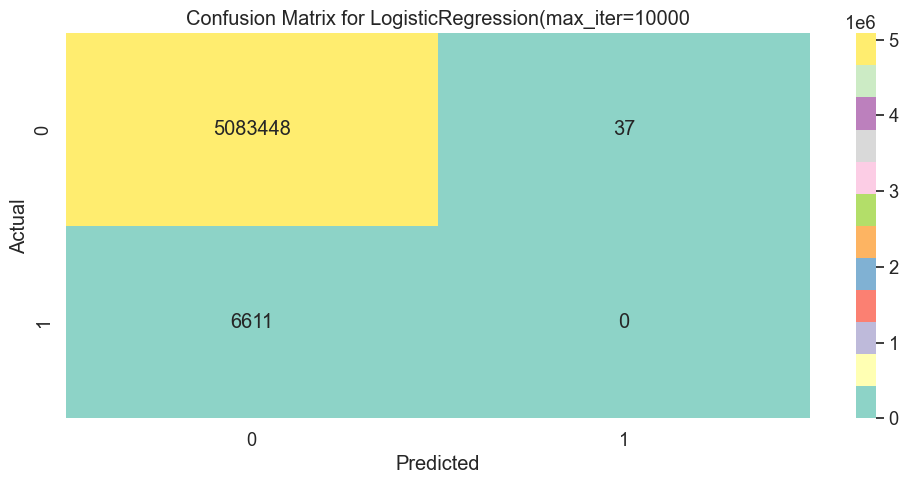

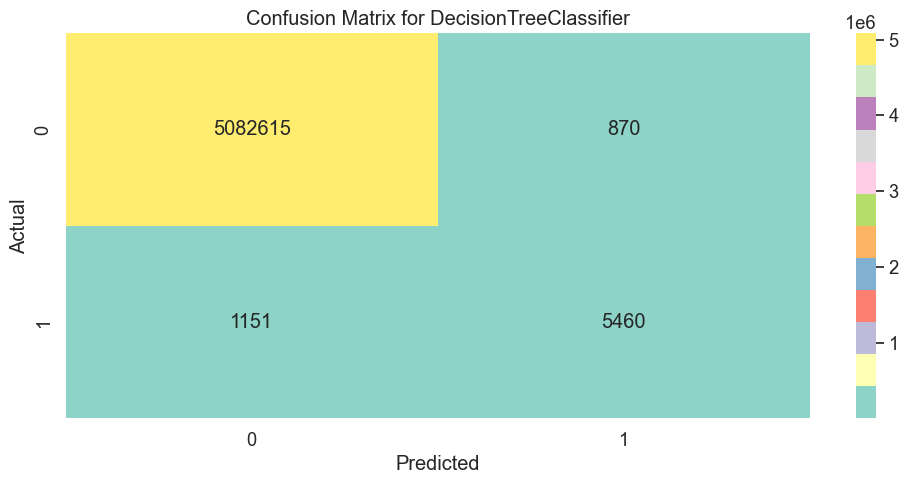

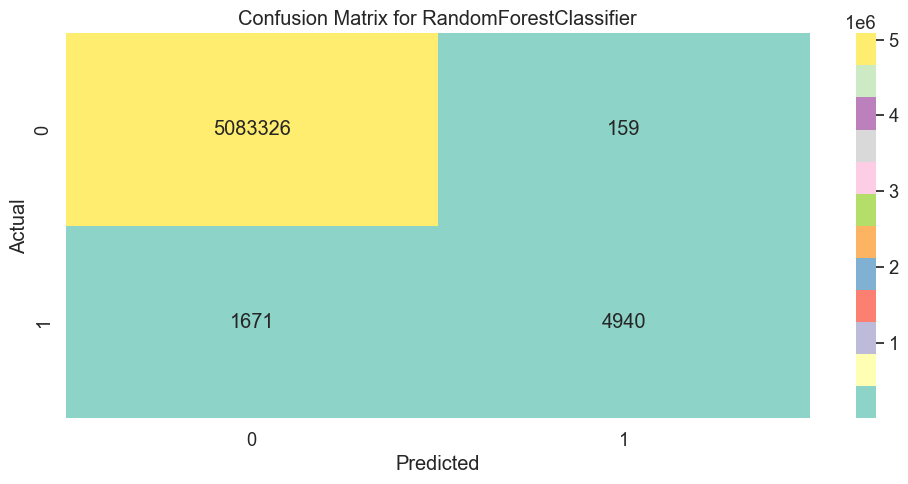

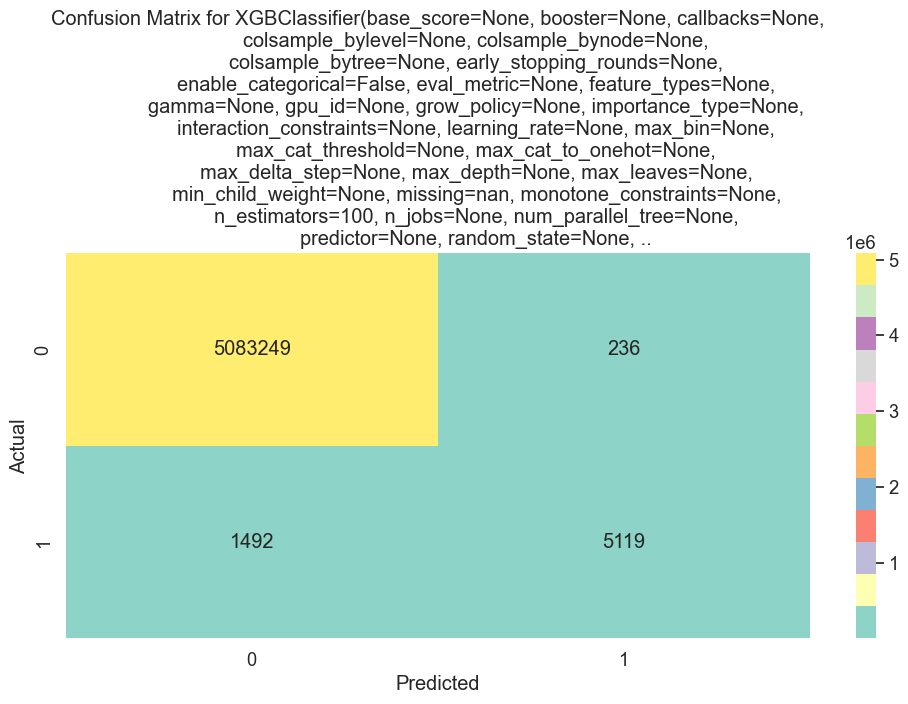

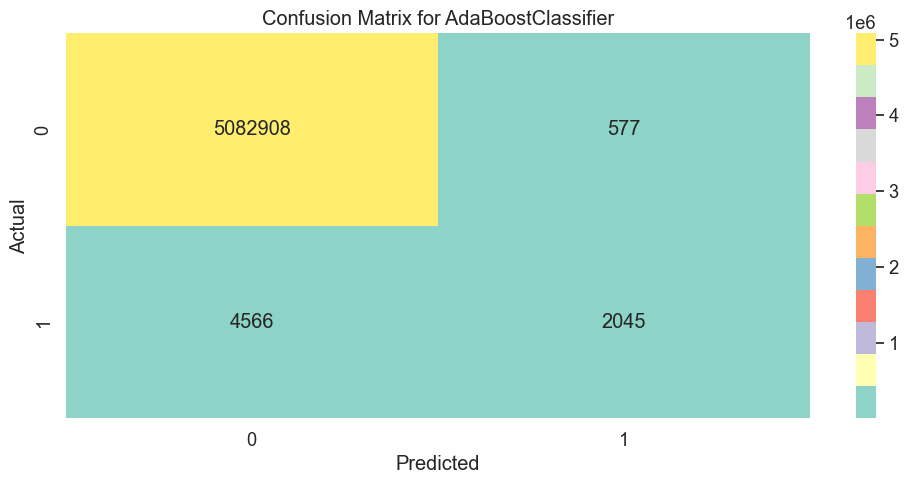

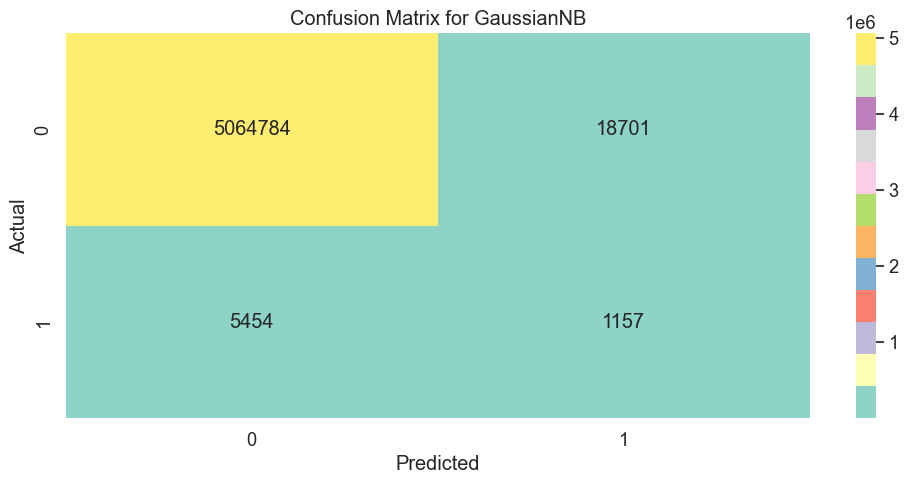

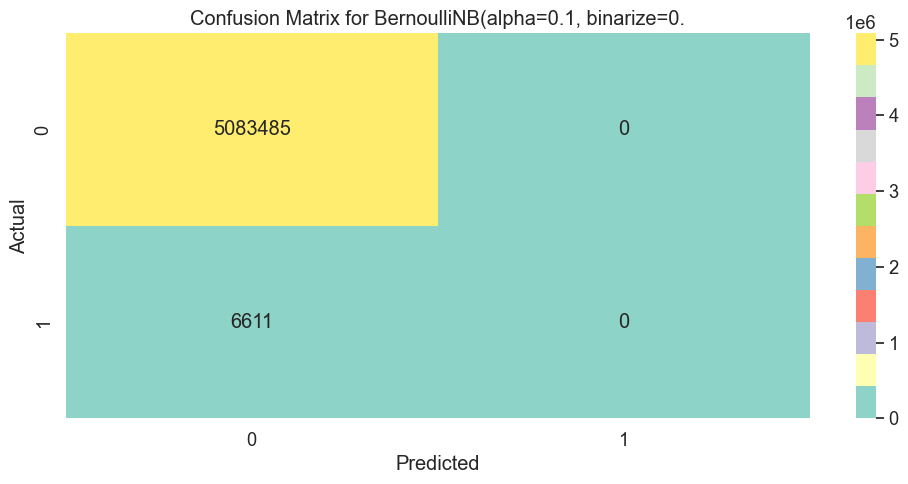

In [25]:
def get_score(model):
    pred=model.predict(x_test)
    conf=confusion_matrix(y_test,pred)
    sns.set(font_scale=1.2)
    plt.figure(figsize=(12,5))
    sns.heatmap(conf, annot=True, fmt="d", cmap="Set3")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f'Confusion Matrix for {str(model)[0:-2]}')

get_score(logistic)
get_score(tree)
get_score(forest)
get_score(xgb)
get_score(ada)
get_score(gus)
get_score(ben)

    
  




depending on the problem you intend to solve , any of these models can be used

In [34]:
prediction_1=np.array([3,850002.52,90000,29885.86,21182.00,339682.13])
xgb.predict(prediction_1.reshape(1, -1))#meaning it's not Fraud

array([0])

In [42]:
prediction_2=np.array([2,85000000,790000000,29885000.86,211820000,578200000.13])
xgb.predict(prediction_2.reshape(1, -1))#meaning it's not Fraud

array([0])

In [46]:
prediction_3=np.array(np.array([4, 9000.60, 9000.60, 0.0,0,0]))
xgb.predict(prediction_3.reshape(1, -1))#meaning it's Fraudulent

array([1])

(-0.5, 3839.5, 2159.5, -0.5)

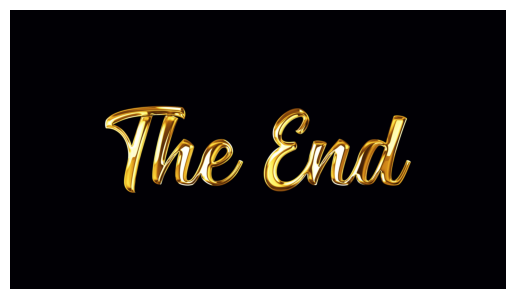

In [61]:
a=plt.imread("loop-light-glowing-effect-free-video.jpeg")
plt.imshow(a)
plt.axis('off')